In [1]:
!git clone https://github.com/nevenaciric/ml09-enzymes-multiclass

Cloning into 'ml09-enzymes-multiclass'...
remote: Enumerating objects: 541242, done.
remote: Total 541242 (delta 0), reused 0 (delta 0), pack-reused 541242
Receiving objects: 100% (541242/541242), 302.32 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (260878/260878), done.
Checking out files: 100% (548492/548492), done.


In [0]:
import pandas as pd

In [0]:
svi_podaci = pd.read_csv('ml09-enzymes-multiclass/svi_podaci.csv', sep='\t')

In [4]:
svi_podaci.head()

,Id enzima,EC numbers,Sekvenca,Funkcionalni domeni
0,Q6LLK1,1.1.1.25,MDKYVVFGNPIAQSKSPFIHTLFARQTAQKMEYTAELAPADGFKLA...,"['Shikimate_dh_N', 'Shikimate_DH', 'Sacchrp_dh..."
1,Q9JPA3,1.3.7.7,MQLTLWTYEGPPHVGAMRVATALDDVHYVLHAPQGDTYADLLFTMI...,"['Oxidored_nitro', 'PCP_red']"
2,Q12XL7,1.2.7.4,MSELTTGRFSISDLDNVQITINNIVGAIEKQSDDIDVEMGPTVKPG...,"['Prismane', 'Fer4_7', 'Fer4_9', 'Fer4_17', 'F..."
3,B3QQZ4,1.3.7.7,MSLVLAVYGKGGIGKSTTSANISAALALKGAKVLQIGCDPKHDSTF...,"['Fer4_NifH', 'CbiA', 'AAA_31', 'ParA', 'ArsA_..."
4,A1VXU6,1.2.1.38,MKIKVGILGASGYAGNELVRILLNHPKVEISYLGSSSSVGQNYQDL...,"['Semialdhyde_dh', 'Semialdhyde_dhC', 'DapB_N']"


In [5]:
svi_podaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212375 entries, 0 to 212374
Data columns (total 4 columns):
Id enzima              212375 non-null object
EC numbers             212375 non-null object
Sekvenca               212375 non-null object
Funkcionalni domeni    212375 non-null object
dtypes: object(4)
memory usage: 6.5+ MB


In [6]:
print('CSV fajl sadrzi informacije o {} enzima'.format(len(svi_podaci)))

CSV fajl sadrzi informacije o 212375 enzima


# Raspodela podataka po klasama na prvom nivou hijerarhije

In [7]:
svi_podaci['EC numbers']

0            1.1.1.25
1             1.3.7.7
2             1.2.7.4
3             1.3.7.7
4            1.2.1.38
5            1.2.1.38
6             1.3.7.7
7             1.3.7.7
8            1.11.1.6
9            1.2.1.38
10           1.2.1.38
11           1.2.1.10
12        1.14.14.152
13            1.9.3.1
14           1.2.1.38
15           1.16.3.1
16           1.2.1.38
17           1.1.1.25
18           1.1.1.25
19           1.2.1.10
20           1.3.1.77
21            1.2.1.8
22           1.2.1.38
23            1.2.1.8
24           1.2.1.38
25         1.13.11.63
26           1.1.1.25
27           1.1.1.25
28            1.3.7.7
29           1.1.1.21
             ...     
212345        7.5.2.1
212346        7.1.2.2
212347        7.1.2.2
212348        7.1.2.2
212349        7.1.2.2
212350        7.1.2.2
212351        7.1.2.2
212352        7.1.2.2
212353        7.1.2.2
212354        7.1.2.2
212355        7.1.2.2
212356        7.1.2.2
212357        7.1.2.2
212358        7.1.2.2
212359    

In [8]:
ec_numbers = list(svi_podaci['EC numbers'])
ec_numbers

['1.1.1.25',
 '1.3.7.7',
 '1.2.7.4',
 '1.3.7.7',
 '1.2.1.38',
 '1.2.1.38',
 '1.3.7.7',
 '1.3.7.7',
 '1.11.1.6',
 '1.2.1.38',
 '1.2.1.38',
 '1.2.1.10',
 '1.14.14.152',
 '1.9.3.1',
 '1.2.1.38',
 '1.16.3.1',
 '1.2.1.38',
 '1.1.1.25',
 '1.1.1.25',
 '1.2.1.10',
 '1.3.1.77',
 '1.2.1.8',
 '1.2.1.38',
 '1.2.1.8',
 '1.2.1.38',
 '1.13.11.63',
 '1.1.1.25',
 '1.1.1.25',
 '1.3.7.7',
 '1.1.1.21',
 '1.2.1.38',
 '1.2.1.38',
 '1.2.1.36',
 '1.20.4.4',
 '1.14.14.102',
 '1.2.1.32',
 '1.2.4.4',
 '1.3.8.13',
 '1.2.1.88',
 '1.14.14.1',
 '1.2.1.5',
 '1.14.17.4',
 '1.2.1.8',
 '1.2.1.8',
 '1.14.15.16',
 '1.14.15.21',
 '1.1.1.288',
 '1.9.3.1',
 '1.14.14.137',
 '1.14.14.137',
 '1.3.3.6',
 '1.7.1.17',
 '1.7.1.17',
 '1.2.1.71',
 '1.1.1.267',
 '1.9.3.1',
 '1.1.1.1',
 '1.9.3.1',
 '1.2.1.10',
 '1.7.1.17',
 '1.3.7.7',
 '1.9.3.1',
 '1.3.99.30',
 '1.1.1.105',
 '1.2.1.10',
 '1.2.1.71',
 '1.9.3.1',
 '1.3.7.7',
 '1.14.14.84',
 '1.1.1.1',
 '1.3.7.7',
 '1.18.6.1',
 '1.3.7.7',
 '1.17.1.8',
 '1.4.1.1',
 '1.1.1.1',
 '1.3.7.7',
 

In [9]:
ec_1 = [ec for ec in ec_numbers if ec[0]=='1']
print('Enzima sa EC brojem 1 ima ukupno {}'.format(len(ec_1)))

Enzima sa EC brojem 1 ima ukupno 26285


In [10]:
ec_2 = [ec for ec in ec_numbers if ec[0]=='2']
print('Enzima sa EC brojem 2 ima ukupno {}'.format(len(ec_2)))

Enzima sa EC brojem 2 ima ukupno 79621


In [11]:
ec_3 = [ec for ec in ec_numbers if ec[0]=='3']
print('Enzima sa EC brojem 3 ima ukupno {}'.format(len(ec_3)))

Enzima sa EC brojem 3 ima ukupno 38780


In [12]:
ec_4 = [ec for ec in ec_numbers if ec[0]=='4']
print('Enzima sa EC brojem 4 ima ukupno {}'.format(len(ec_4)))

Enzima sa EC brojem 4 ima ukupno 22191


In [13]:
ec_5 = [ec for ec in ec_numbers if ec[0]=='5']
print('Enzima sa EC brojem 5 ima ukupno {}'.format(len(ec_5)))

Enzima sa EC brojem 5 ima ukupno 13385


In [14]:
ec_6 = [ec for ec in ec_numbers if ec[0]=='6']
print('Enzima sa EC brojem 6 ima ukupno {}'.format(len(ec_6)))

Enzima sa EC brojem 6 ima ukupno 26003


In [15]:
ec_7 = [ec for ec in ec_numbers if ec[0]=='7']
print('Enzima sa EC brojem 7 ima ukupno {}'.format(len(ec_7)))

Enzima sa EC brojem 7 ima ukupno 6110


In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

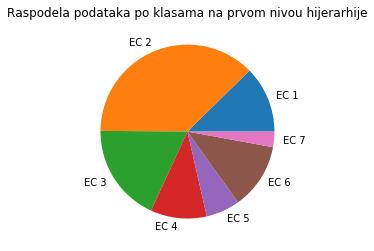

In [17]:
x = [len(ec_1), len(ec_2), len(ec_3), len(ec_4), len(ec_5), len(ec_6), len(ec_7)]
labels = ['EC 1', 'EC 2', 'EC 3', 'EC 4', 'EC 5', 'EC 6', 'EC 7']
plt.pie(x, labels=labels)
plt.title('Raspodela podataka po klasama na prvom nivou hijerarhije')
plt.show()

In [18]:
ec_1_subclasses = [int(ec.split('.')[1]) for ec in ec_1]
ec_1_subclasses_labels = sorted(set(ec_1_subclasses))
print('Podklase klase EC 1 su: {}'.format(ec_1_subclasses_labels))

Podklase klase EC 1 su: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 97]


**NAPOMENA:** ovde postoji klasa 'Other Oxidoreductases' koja ima oznaku 97, ali to nije klasa 'Others' koju mi zelimo da imamo (mi zelimo da 'Others' predstavlja 'Non-Oxidoreductases')!

**NAPOMENA:** U Uniprot bazi postoji tacno jedan enzim sa EC 1.22, ali on takodje pripada i 1.21, tako da ispravno je i ako klasifikator nauci da ga klasifikuje u 1.21! Isto to vazi i za klasu 1.19 (pripadaju ujedno i 1.18)!

In [19]:
ec_2_subclasses = [int(ec.split('.')[1]) for ec in ec_2]
ec_2_subclasses_labels = sorted(set(ec_2_subclasses))
print('Podklase klase EC 2 su: {}'.format(ec_2_subclasses_labels))

Podklase klase EC 2 su: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [20]:
ec_3_subclasses = [int(ec.split('.')[1]) for ec in ec_3]
ec_3_subclasses_labels = sorted(set(ec_3_subclasses))
print('Podklase klase EC 3 su: {}'.format(ec_3_subclasses_labels))

Podklase klase EC 3 su: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


**NAPOMENA:** U Uniprot bazi postoje tacno dva enzima sa EC 3.12, ali oba imaju nepotpun EC broj, pa su stoga izbaceni iz skupa podataka!

In [21]:
ec_4_subclasses = [int(ec.split('.')[1]) for ec in ec_4]
ec_4_subclasses_labels = sorted(set(ec_4_subclasses))
print('Podklase klase EC 4 su: {}'.format(ec_4_subclasses_labels))

Podklase klase EC 4 su: [1, 2, 3, 4, 5, 6, 7, 99]


**NAPOMENA:** ovde postoji klasa 'Other Lyases' koja ima oznaku 99, ali to nije klasa 'Others' koju mi zelimo da imamo (mi zelimo da 'Others' predstavlja 'Non-Lyases')!

In [22]:
ec_5_subclasses = [int(ec.split('.')[1]) for ec in ec_5]
ec_5_subclasses_labels = sorted(set(ec_5_subclasses))
print('Podklase klase EC 5 su: {}'.format(ec_5_subclasses_labels))

Podklase klase EC 5 su: [1, 2, 3, 4, 5, 6, 99]


**NAPOMENA:** ovde postoji klasa 'Other Isomerases' koja ima oznaku 99, ali to nije klasa 'Others' koju mi zelimo da imamo (mi zelimo da 'Others' predstavlja 'Non-Isomerases')!

In [23]:
ec_6_subclasses = [int(ec.split('.')[1]) for ec in ec_6]
ec_6_subclasses_labels = sorted(set(ec_6_subclasses))
print('Podklase klase EC 6 su: {}'.format(ec_6_subclasses_labels))

Podklase klase EC 6 su: [1, 2, 3, 4, 5, 6]


In [24]:
ec_7_subclasses = [int(ec.split('.')[1]) for ec in ec_7]
ec_7_subclasses_labels = sorted(set(ec_7_subclasses))
print('Podklase klase EC 7 su: {}'.format(ec_7_subclasses_labels))

Podklase klase EC 7 su: [1, 2, 3, 4, 5, 6]


# Raspodela podataka po klasama na drugom nivou hijerarhije

In [0]:
ec_1_ = [0 for i in range(len(ec_1_subclasses_labels))]

i = 0
for ec_1_subclass in ec_1_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '1' and ec.split('.')[1]==str(ec_1_subclass)]
  ec_1_[i] = len(l)
  i += 1

In [26]:
sum(ec_1_)

26285

[]

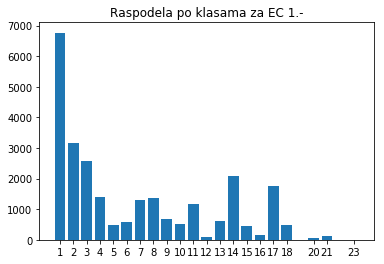

In [60]:
plt.bar(ec_1_subclasses_labels[:-1], ec_1_[:-1])
plt.xticks(ec_1_subclasses_labels[:-1])
plt.title('Raspodela po klasama za EC 1.-')
plt.plot()

In [0]:
ec_2_ = [0 for i in range(len(ec_2_subclasses_labels))]

i = 0
for ec_2_subclass in ec_2_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '2' and ec.split('.')[1]==str(ec_2_subclass)]
  ec_2_[i] = len(l)
  i += 1

In [29]:
sum(ec_2_)

79621

[]

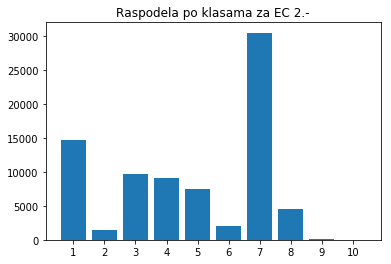

In [61]:
plt.bar(ec_2_subclasses_labels, ec_2_)
plt.xticks(ec_2_subclasses_labels)
plt.title('Raspodela po klasama za EC 2.-')
plt.plot()

In [0]:
ec_3_ = [0 for i in range(len(ec_3_subclasses_labels))]

i = 0
for ec_3_subclass in ec_3_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '3' and ec.split('.')[1]==str(ec_3_subclass)]
  ec_3_[i] = len(l)
  i += 1

In [32]:
sum(ec_3_)

38780

[]

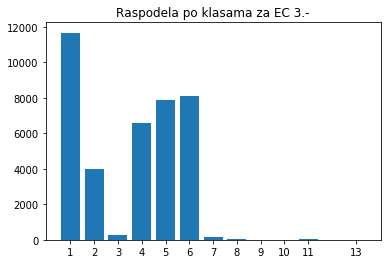

In [62]:
plt.bar(ec_3_subclasses_labels, ec_3_)
plt.xticks(ec_3_subclasses_labels)
plt.title('Raspodela po klasama za EC 3.-')
plt.plot()

In [0]:
ec_4_ = [0 for i in range(len(ec_4_subclasses_labels))]

i = 0
for ec_4_subclass in ec_4_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '4' and ec.split('.')[1]==str(ec_4_subclass)]
  ec_4_[i] = len(l)
  i += 1

In [35]:
sum(ec_4_)

22191

[]

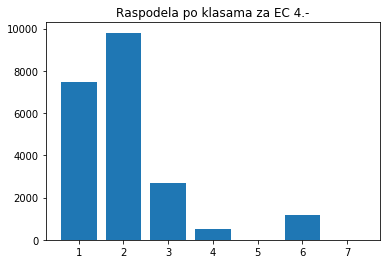

In [63]:
plt.bar(ec_4_subclasses_labels[:-1], ec_4_[:-1])
plt.xticks(ec_4_subclasses_labels[:-1])
plt.title('Raspodela po klasama za EC 4.-')
plt.plot()

In [0]:
ec_5_ = [0 for i in range(len(ec_5_subclasses_labels))]

i = 0
for ec_5_subclass in ec_5_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '5' and ec.split('.')[1]==str(ec_5_subclass)]
  ec_5_[i] = len(l)
  i += 1

In [38]:
sum(ec_5_)

13385

[]

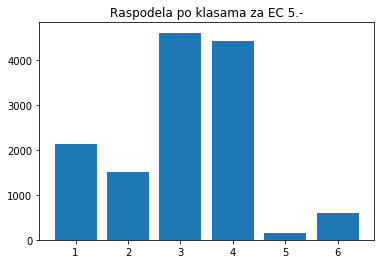

In [64]:
plt.bar(ec_5_subclasses_labels[:-1], ec_5_[:-1])
plt.xticks(ec_5_subclasses_labels[:-1])
plt.title('Raspodela po klasama za EC 5.-')
plt.plot()

In [0]:
ec_6_ = [0 for i in range(len(ec_6_subclasses_labels))]

i = 0
for ec_6_subclass in ec_6_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '6' and ec.split('.')[1]==str(ec_6_subclass)]
  ec_6_[i] = len(l)
  i += 1

In [41]:
sum(ec_6_)

26003

[]

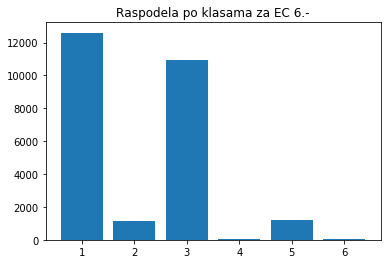

In [65]:
plt.bar(ec_6_subclasses_labels, ec_6_)
plt.xticks(ec_6_subclasses_labels)
plt.title('Raspodela po klasama za EC 6.-')
plt.plot()

In [0]:
ec_7_ = [0 for i in range(len(ec_7_subclasses_labels))]

i = 0
for ec_7_subclass in ec_7_subclasses_labels:
  l = [ec for ec in ec_numbers if ec.split('.')[0] == '7' and ec.split('.')[1]==str(ec_7_subclass)]
  ec_7_[i] = len(l)
  i += 1

In [44]:
sum(ec_7_)

6110

[]

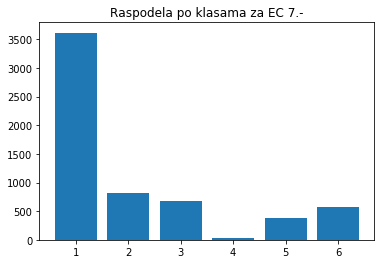

In [66]:
plt.bar(ec_7_subclasses_labels, ec_7_)
plt.xticks(ec_7_subclasses_labels)
plt.title('Raspodela po klasama za EC 7.-')
plt.plot()

# Broj razlicitih funkcionalnih domena

In [46]:
fun_d = list(svi_podaci['Funkcionalni domeni'])
fun_d

["['Shikimate_dh_N', 'Shikimate_DH', 'Sacchrp_dh_NADP']",
 "['Oxidored_nitro', 'PCP_red']",
 "['Prismane', 'Fer4_7', 'Fer4_9', 'Fer4_17', 'Fer4_10', 'Fer4', 'Fer4_21', 'Fer4_8', 'Fer4_2', 'Fer4_16', 'Fer4_4', 'Fer4_20', 'Fer4_6', 'Fer4_18', 'Fer4_13']",
 "['Fer4_NifH', 'CbiA', 'AAA_31', 'ParA', 'ArsA_ATPase', 'MipZ', 'AAA_24', 'AAA_16', 'SRP54', 'ArgK', 'NB-ARC', 'AAA_26', 'DUF87']",
 "['Semialdhyde_dh', 'Semialdhyde_dhC', 'DapB_N']",
 "['Semialdhyde_dh', 'Semialdhyde_dhC', 'DapB_N', 'GFO_IDH_MocA', 'RmlD_sub_bind']",
 "['Fer4_NifH', 'CbiA', 'AAA_31', 'ArsA_ATPase', 'ParA', 'AAA_24', 'MipZ', 'ArgK', 'SRP54', 'AAA_26', 'AAA_16', 'AAA_25', 'RNA_helicase', 'CLP1_P', 'DUF87']",
 "['Oxidored_nitro']",
 "['Catalase', 'Catalase-rel']",
 "['Semialdhyde_dh', 'Semialdhyde_dhC', 'F420_oxidored']",
 "['Semialdhyde_dh', 'Semialdhyde_dhC', 'DapB_N', 'NAD_binding_10', 'GFO_IDH_MocA', 'F420_oxidored']",
 "['AcetDehyd-dimer', 'Semialdhyde_dh', 'GFO_IDH_MocA', 'DapB_N', 'Adenyl_transf']",
 "['p450']",
 

In [47]:
fun_d[0]

"['Shikimate_dh_N', 'Shikimate_DH', 'Sacchrp_dh_NADP']"

In [48]:
fun_d[0][1:-1]

"'Shikimate_dh_N', 'Shikimate_DH', 'Sacchrp_dh_NADP'"

In [49]:
fun_d[0][1:-1].split(',')

["'Shikimate_dh_N'", " 'Shikimate_DH'", " 'Sacchrp_dh_NADP'"]

In [0]:
set_fun_d = set([])

for str_fun_d in fun_d:
  str_fun_d = str_fun_d[1:-1]  
  l_fun_d = str_fun_d.split(',')
  
  for elem_fun_d in l_fun_d:
    set_fun_d.add(elem_fun_d)

In [67]:
print('Broj razlicitih funkcionalnih domena je {}'.format(len(set_fun_d)))

Broj razlicitih funkcionalnih domena je 16451
